In [1]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [5]:
len(cities)

621

In [6]:
print(f"{cities}")

['porto novo', 'yellowknife', 'geraldton', 'iaciara', 'hobart', 'nanortalik', 'bluff', 'nouadhibou', 'port alfred', 'sahrak', 'kahului', 'nguiu', 'ushuaia', 'kapaa', 'jamestown', 'taolanaro', 'aksarka', 'burla', 'vaitupu', 'las cruces', 'victoria', 'hermanus', 'namibe', 'clyde river', 'naples', 'bonavista', 'longyearbyen', 'kaitangata', 'kirakira', 'vaini', 'fernie', 'mataura', 'ribeira grande', 'kloulklubed', 'beringovskiy', 'arraial do cabo', 'deputatskiy', 'iskitim', 'pisco', 'touros', 'provideniya', 'tuktoyaktuk', 'semey', 'bredasdorp', 'zhigansk', 'toyooka', 'puerto ayora', 'aleksandrovsk-sakhalinskiy', 'rikitea', 'dunedin', 'bengkulu', 'illoqqortoormiut', 'khatanga', 'arequipa', 'buala', 'butaritari', 'nikolskoye', 'itoman', 'saint-georges', 'birao', 'yulara', 'albany', 'chabahar', 'punta arenas', 'sens', 'mys shmidta', 'busselton', 'chuy', 'beyneu', 'cabedelo', 'oranjemund', 'atuona', 'klaksvik', 'cape town', 'crab hill', 'champerico', 'dekar', 'saint anthony', 'anloga', 'skibbe

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=811e3962187ddf32f6513558a7473185&units=metric&q=


In [9]:
city_list = []
lat_list = []
lon_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []

In [10]:
for city in cities:
    response = requests.get(query_url + city).json()
    
    try: 
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloudiness_list.append(response['clouds']['all'])
        wind_speed_list.append(response['wind']['speed'])
        print("Processing Record" + city)
    
    except: 
        print("City not found" + city)
        

Processing Recordporto novo
Processing Recordyellowknife
Processing Recordgeraldton
Processing Recordiaciara
Processing Recordhobart
Processing Recordnanortalik
Processing Recordbluff
Processing Recordnouadhibou
Processing Recordport alfred
City not foundsahrak
Processing Recordkahului
City not foundnguiu
Processing Recordushuaia
Processing Recordkapaa
Processing Recordjamestown
City not foundtaolanaro
Processing Recordaksarka
Processing Recordburla
City not foundvaitupu
Processing Recordlas cruces
Processing Recordvictoria
Processing Recordhermanus
Processing Recordnamibe
Processing Recordclyde river
Processing Recordnaples
Processing Recordbonavista
Processing Recordlongyearbyen
Processing Recordkaitangata
Processing Recordkirakira
Processing Recordvaini
Processing Recordfernie
Processing Recordmataura
Processing Recordribeira grande
Processing Recordkloulklubed
Processing Recordberingovskiy
Processing Recordarraial do cabo
Processing Recorddeputatskiy
Processing Recordiskitim
Proces

In [11]:
weather_dict = {
    "City": city_list,
    "Lat": lat_list,
    "Lng": lon_list,
    "Max Temp":max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed": wind_speed_list
    }
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto-Novo,6.4965,2.6036,25.90,84,89,1.80
1,Yellowknife,62.4560,-114.3525,-29.77,82,40,5.66
2,Geraldton,-28.7667,114.6000,23.96,43,40,5.66
3,Iaciara,-14.0958,-46.6317,20.72,96,100,0.97
4,Hobart,-42.8794,147.3294,29.92,35,0,1.79
...,...,...,...,...,...,...,...
554,Laguna,38.4210,-121.4238,7.36,92,1,2.57
555,Kupang,-10.1667,123.5833,32.32,74,40,3.09
556,Ishigaki,24.3448,124.1572,17.07,59,75,6.69
557,Humboldt,40.6665,-123.9178,0.28,92,57,1.71


In [12]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,19.843321,14.890685,10.468497,73.577818,59.146691,3.480930
std,33.116355,88.973502,17.058950,21.331164,39.670280,2.619647
min,-54.800000,-179.166700,-40.280000,9.000000,0.000000,0.000000
25%,-7.340850,-64.057050,1.770000,60.000000,18.000000,1.540000
50%,22.545500,18.400900,15.310000,78.000000,75.000000,2.680000
75%,46.682000,85.433350,23.570000,91.000000,99.000000,4.930000
max,78.218600,179.316700,42.030000,100.000000,100.000000,17.380000


In [13]:
humid_city = weather_data.loc[weather_data["Humidity"]>100]
humid_city.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


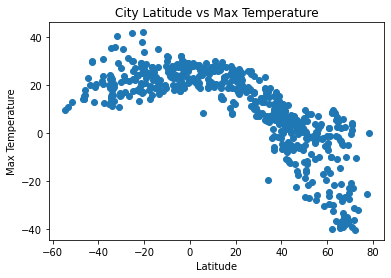

In [14]:
# When the latitude increases, the temprature drops
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

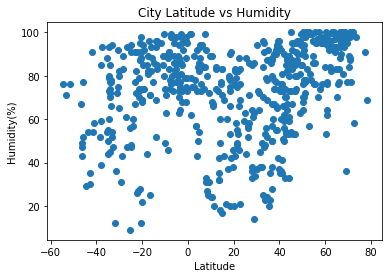

In [15]:
#overall high level of humidity 
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

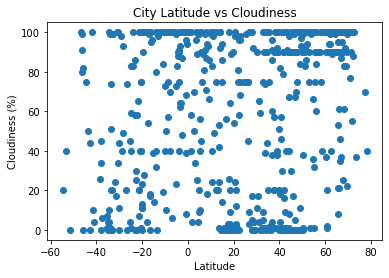

In [16]:
#high variation of cloudiness across all latitudes, so no relationship is observed. 
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

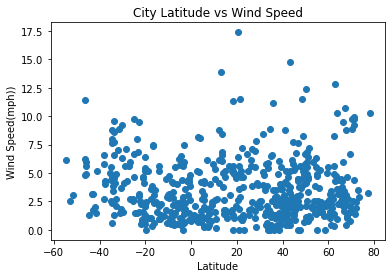

In [17]:
# wind speed remains relatively same aross latitudes
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph))')
plt.show()

In [18]:
northern_hemisphere = weather_data.loc[weather_data["Lat"]>=0]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto-Novo,6.4965,2.6036,25.90,84,89,1.80
1,Yellowknife,62.4560,-114.3525,-29.77,82,40,5.66
5,Nanortalik,60.1432,-45.2371,-4.10,53,37,2.64
7,Nouadhibou,20.9310,-17.0347,16.99,82,3,5.66
9,Kahului,20.8947,-156.4700,26.01,79,20,3.60


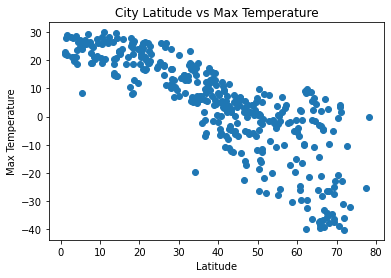

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      27.722492
1     -12.350361
5     -10.694155
7      17.385881
9      17.411876
         ...    
552    -9.736078
553    -6.696787
554     4.861212
556    14.941243
557     3.253199
Name: Lat, Length: 379, dtype: float64


In [22]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.72x +32.37


The r-value is: 0.6778639712310551


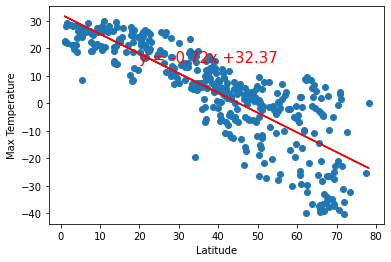

In [23]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

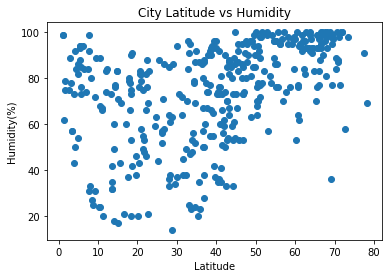

In [24]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

0      58.471667
1      84.890279
5      83.798400
7      65.286229
9      65.269091
         ...    
552    83.166775
553    81.163078
554    73.543299
556    66.897892
557    74.603404
Name: Lat, Length: 379, dtype: float64


In [26]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.47x +55.4


The r-value is: 0.18472458595923102


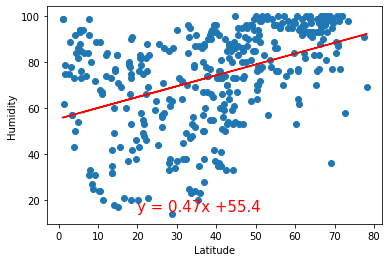

In [27]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

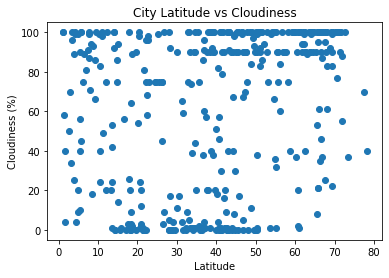

In [28]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

0      45.125691
1      71.253669
5      70.173802
7      51.865285
9      51.848336
         ...    
552    69.549125
553    67.567471
554    60.031518
556    53.459218
557    61.079961
Name: Lat, Length: 379, dtype: float64


In [30]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.47x +42.09


The r-value is: 0.0544150476960657


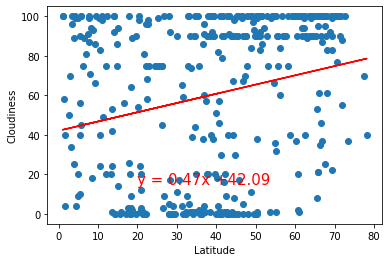

In [31]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

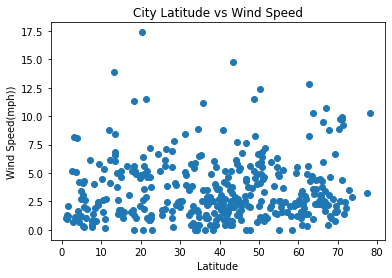

In [32]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph))')
plt.show()

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      3.190491
1      3.671221
5      3.651352
7      3.314493
9      3.314181
         ...   
552    3.639859
553    3.603398
554    3.464744
556    3.343820
557    3.484034
Name: Lat, Length: 379, dtype: float64


In [34]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +3.13


The r-value is: 0.003927548273011448


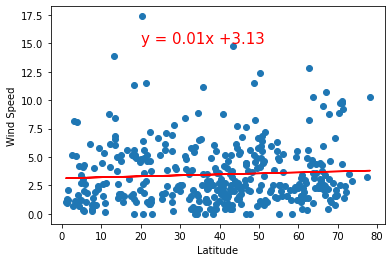

In [35]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [36]:
southern_hemisphere = weather_data.loc[weather_data["Lat"]<0]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Geraldton,-28.7667,114.6000,23.96,43,40,5.66
3,Iaciara,-14.0958,-46.6317,20.72,96,100,0.97
4,Hobart,-42.8794,147.3294,29.92,35,0,1.79
6,Bluff,-46.6000,168.3333,14.33,67,100,11.42
8,Port Alfred,-33.5906,26.8910,15.88,77,20,9.58


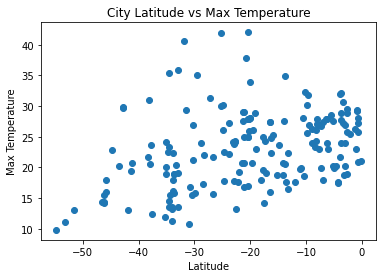

In [37]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      21.675416
3      24.111247
4      19.332264
6      18.714527
8      20.874497
         ...    
544    26.253186
545    25.121864
550    24.848278
555    24.763602
558    21.305000
Name: Lat, Length: 180, dtype: float64


In [39]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.17x +26.45


The r-value is: 0.12947649986899168


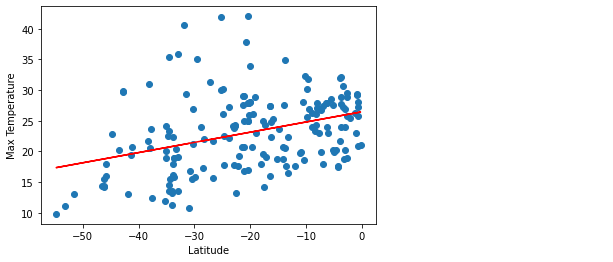

In [40]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

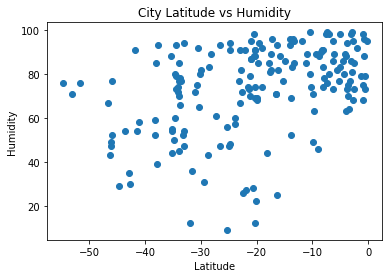

In [41]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

2      68.009793
3      76.962962
4      59.397275
6      57.126715
8      65.065925
         ...    
544    84.835898
545    80.677598
550    79.672000
555    79.360763
558    66.648287
Name: Lat, Length: 180, dtype: float64


In [43]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.61x +85.57


The r-value is: 0.16626908997976775


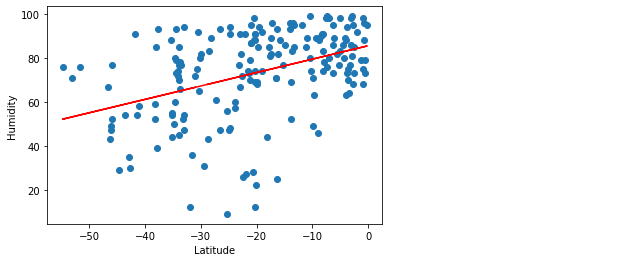

In [44]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

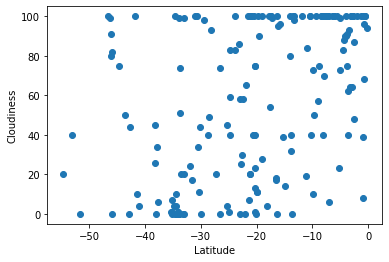

In [45]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

2      46.121543
3      64.743638
4      28.207983
6      23.485344
8      39.998461
         ...    
544    81.118906
545    72.469873
550    70.378285
555    69.730931
558    43.289686
Name: Lat, Length: 180, dtype: float64


In [47]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 1.27x +82.64


The r-value is: 0.1902055717467844


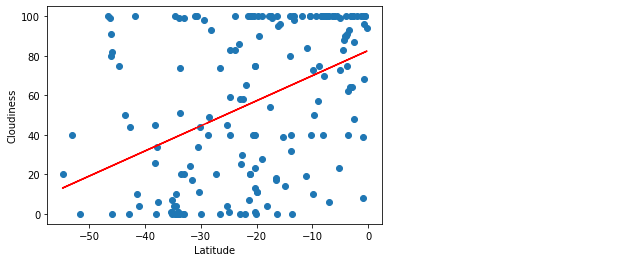

In [48]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

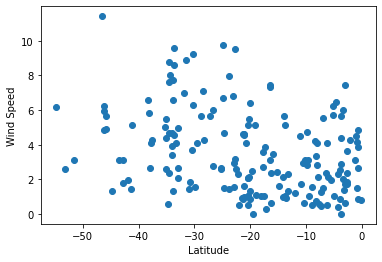

In [49]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [50]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

2      3.999196
3      3.135547
4      4.829985
6      5.049010
8      4.283170
         ...   
544    2.376100
545    2.777222
550    2.874225
555    2.904248
558    4.130531
Name: Lat, Length: 180, dtype: float64


The r-value is: 0.11149077757538511


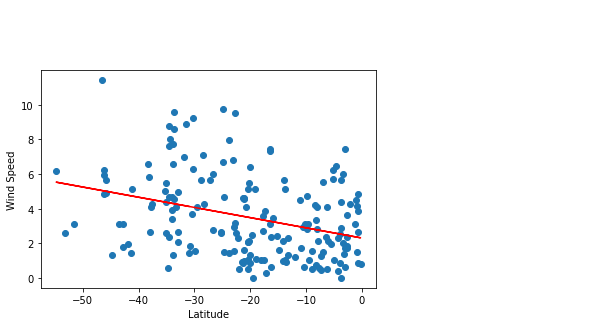

In [51]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [53]:
weather_data.to_csv(r'C:\Users\anita\APIs\weather_data.csv',encoding="utf-8", index = False, header=True)
print(weather_data)

            City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0     Porto-Novo   6.4965    2.6036     25.90        84          89   
1    Yellowknife  62.4560 -114.3525    -29.77        82          40   
2      Geraldton -28.7667  114.6000     23.96        43          40   
3        Iaciara -14.0958  -46.6317     20.72        96         100   
4         Hobart -42.8794  147.3294     29.92        35           0   
..           ...      ...       ...       ...       ...         ...   
554       Laguna  38.4210 -121.4238      7.36        92           1   
555       Kupang -10.1667  123.5833     32.32        74          40   
556     Ishigaki  24.3448  124.1572     17.07        59          75   
557     Humboldt  40.6665 -123.9178      0.28        92          57   
558  Burgersdorp -30.9977   26.3286     10.78        72         100   

     Wind Speed  
0          1.80  
1          5.66  
2          5.66  
3          0.97  
4          1.79  
..          ...  
554        2.57  
555